## ROAD LANE DETECTION

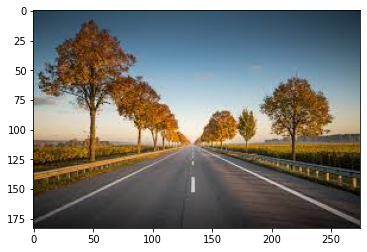

(183, 275, 3)


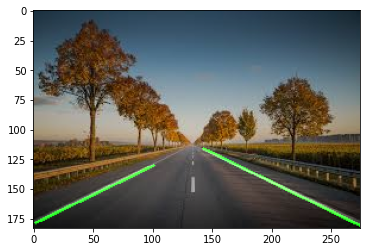

In [2]:
import matplotlib.pylab as plt
import cv2
import numpy as np

image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [ 
    (-120,(height + 25)),
    ((width/2)+10, (height/2)+23),
    (width+110, (height + 50))
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
#     channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 120)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)
lines = cv2.HoughLinesP(cropped_image,
                            rho=1,
                            theta=np.pi/90,
                            threshold=75,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)

    
def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=2)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img
image_with_lines = drow_the_lines(image, lines)

plt.imshow(image_with_lines)
plt.show()